In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
import math
from collections import Counter
import pandas as pd
from scipy.stats import norm

In [2]:
# load data
mousename = 'Krebs' # Krebs / Waksman
deltat = '1p0' # 0p1 or 1p0 for examples
folderpath = # where you are storing the project files
infile = open(folderpath+'/npy/communities/'+mousename+'_'+deltat+'_rectified_total_signal_final_cell_info.pkl','rb')
data_load = pickle.load(infile)
infile.close()
data_load_sorted = data_load.sort_values(by=['cell_region'])
data_table = data_load_sorted

In [3]:
# extract cluster ids and convert to array
a = data_table["consensus_cluster"].items()
b = list(a)
c = np.array(b)
cluster_ids = c[:,1]

In [4]:
# extract cell ids and convert to array
a = data_table.index
cell_ids = list(a)

In [5]:
# extract region ids and convert to array
a = data_table["cell_region"].items()
b = list(a)
c = np.array(b)
region_ids = c[:,1]

In [6]:
# get unique region IDs
region_set = set(region_ids)
region_list = []
for region in region_set:
    region_list.append(region)
region_list = np.sort(region_list) # sort alphabetically

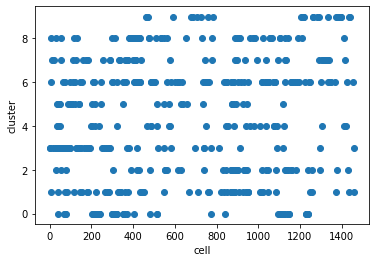

In [7]:
plt.scatter(cell_ids,cluster_ids)
plt.xlabel("cell")
plt.ylabel("cluster")
plt.show()

In [8]:
ncells = len(cell_ids)
angle_vec = np.linspace(0,2*math.pi*((ncells-1)/ncells),ncells)
radius = 1.
colour_list = ['orange','skyblue','mediumspringgreen','royalblue','darkgray','yellow','violet','yellowgreen','tomato']
region_colour_dict = {}
for i in range(len(region_list)):
    region_colour_dict[region_list[i]] = colour_list[i]

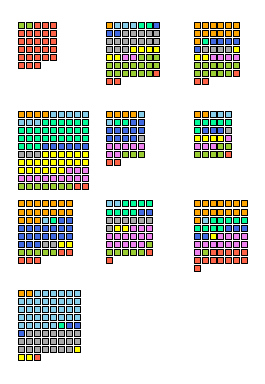

In [675]:
# make communities squares plot
nclusters = len(np.unique(cluster_ids))
ncell_each_cluster = np.histogram(cluster_ids,np.arange(-0.5,nclusters))[0]
nplotcols = int(np.sqrt(nclusters))
nplotrows = int(np.ceil(nclusters/nplotcols))
if deltat == '0p1':
    cluster_delta = 0.55/(np.max((nplotcols,nplotrows)))
    plt.figure(figsize=(1.5*nplotcols,1.7*nplotrows))
    for i in range(nclusters):
        iback = nclusters-i-1
        clusterrow = np.floor_divide(i,nplotcols)
        clustercol = np.remainder(i,nplotcols)
        clustercellinds = np.where(cluster_ids==iback)[0]
        ncellsincluster = len(clustercellinds)
        ncellcols = int(np.sqrt(ncellsincluster))
        for j in range(ncellsincluster):
            cellrow = np.floor_divide(j,ncellcols)
            cellcol = np.remainder(j,ncellcols)
            cell_colour = region_colour_dict[data_table.loc[cell_ids[clustercellinds[j]],"cell_region"]]
            plt.scatter(clustercol + cluster_delta*cellcol,-clusterrow - cluster_delta*cellrow,s=40,facecolors=cell_colour,marker='s',edgecolors='black')
elif deltat=='1p0':
    cluster_delta = 0.36/(np.max((nplotcols,nplotrows)))
    plt.figure(figsize=(1.5*nplotcols,1.7*nplotrows))
    for i in range(nclusters):
        iback = nclusters-i-1
        clusterrow = np.floor_divide(i,nplotcols)
        clustercol = np.remainder(i,nplotcols)
        clustercellinds = np.where(cluster_ids==iback)[0]
        ncellsincluster = len(clustercellinds)
        ncellcols = int(np.sqrt(ncellsincluster))
        for j in range(ncellsincluster):
            cellrow = np.floor_divide(j,ncellcols)
            cellcol = np.remainder(j,ncellcols)
            cell_colour = region_colour_dict[data_table.loc[cell_ids[clustercellinds[j]],"cell_region"]]
            plt.scatter(clustercol + cluster_delta*cellcol,-clusterrow - cluster_delta*cellrow,s=30,facecolors=cell_colour,marker='s',edgecolors='black')
plt.axis('off')
plt.savefig('/Users/co15268/OneDrive - University of Bristol/eightprobe/cian_code/figs/communities_'+mousename+'_'+deltat+'.png', bbox_inches='tight',dpi=600,facecolor='white')
plt.savefig('/Users/co15268/OneDrive - University of Bristol/eightprobe/cian_code/figs/communities_'+mousename+'_'+deltat+'.svg', bbox_inches='tight',dpi=600,facecolor='white')


In [676]:
# get cell_id list sorted by community
cellids_by_community = np.argsort(-cluster_ids)
cellids_by_region = np.argsort(region_ids)

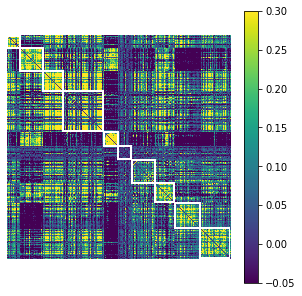

In [677]:
# load correlations from file
corrfilename = folderpath+'/analysis_csvs/Krebs_'+deltat+'_analysis.csv'
corrtable = np.loadtxt(open(corrfilename, "rb"), delimiter=",", skiprows=1)
lencorrtable = len(corrtable)

# make correlation matrix sorted by community
corrmat = np.zeros((ncells,ncells))
for i in range(lencorrtable):
    if len(np.where(np.asarray(cell_ids)==corrtable[i,2])[0])>0:
        celli_ind = np.where(np.asarray(cell_ids)==corrtable[i,2])[0][0]
        if len(np.where(np.asarray(cell_ids)==corrtable[i,5])[0])>0:
            cellj_ind = np.where(np.asarray(cell_ids)==corrtable[i,5])[0][0]
            if len(np.where(cellids_by_community==celli_ind)[0])>0:
                celli_ind_sorted = np.where(cellids_by_community==celli_ind)[0][0]
                if len(np.where(cellids_by_community==cellj_ind)[0])>0:
                    cellj_ind_sorted = np.where(cellids_by_community==cellj_ind)[0][0]
                    corrmat[celli_ind_sorted,cellj_ind_sorted] = corrtable[i,0]
                    corrmat[cellj_ind_sorted,celli_ind_sorted] = corrtable[i,0]
plt.figure(figsize=(5,5))
plt.imshow(corrmat,vmin=-0.05,vmax=0.3)
anchorpoints = np.append(0,np.cumsum(np.flipud(ncell_each_cluster))[0:-1])
for i in range(nclusters):
    rect = patches.Rectangle((anchorpoints[i], anchorpoints[i]), np.flipud(ncell_each_cluster)[i]-1, np.flipud(ncell_each_cluster)[i]-1, linewidth=2, edgecolor='white', facecolor='none')
    plt.gca().add_patch(rect)
plt.axis('off')
plt.colorbar()
plt.savefig('figs/corrmat_by_communities_Krebs_'+deltat+'.png',dpi=300,bbox_inches='tight')
plt.savefig('figs/corrmat_by_communities_Krebs_'+deltat+'.svg',dpi=300,bbox_inches='tight')

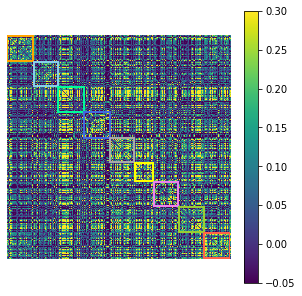

In [678]:
# make correlation matrix sorted by region
corrmat = np.zeros((ncells,ncells))
for i in range(lencorrtable):
    if len(np.where(np.asarray(cell_ids)==corrtable[i,2])[0])>0:
        celli_ind = np.where(np.asarray(cell_ids)==corrtable[i,2])[0][0]
        if len(np.where(np.asarray(cell_ids)==corrtable[i,5])[0])>0:
            cellj_ind = np.where(np.asarray(cell_ids)==corrtable[i,5])[0][0]
            if len(np.where(cellids_by_region==celli_ind)[0])>0:
                celli_ind_sorted = np.where(cellids_by_region==celli_ind)[0][0]
                if len(np.where(cellids_by_region==cellj_ind)[0])>0:
                    cellj_ind_sorted = np.where(cellids_by_region==cellj_ind)[0][0]
                    corrmat[celli_ind_sorted,cellj_ind_sorted] = corrtable[i,0]
                    corrmat[cellj_ind_sorted,celli_ind_sorted] = corrtable[i,0]
plt.figure(figsize=(5,5))
plt.imshow(corrmat,vmin=-0.05,vmax=0.3)
letter_counts = Counter(region_ids)
countanchor = 0
for i in range(nregions):
    rect = patches.Rectangle((countanchor, countanchor), letter_counts[region_list[i]]-1, letter_counts[region_list[i]]-1, linewidth=2, edgecolor=region_colour_dict[region_list[i]], facecolor='none')
    plt.gca().add_patch(rect)
    countanchor += letter_counts[region_list[i]]
plt.axis('off')
plt.colorbar()
plt.savefig('figs/corrmat_by_regions_Krebs_'+deltat+'.png',dpi=500,bbox_inches='tight')
plt.savefig('figs/corrmat_by_regions_Krebs_'+deltat+'.svg',dpi=500,bbox_inches='tight')

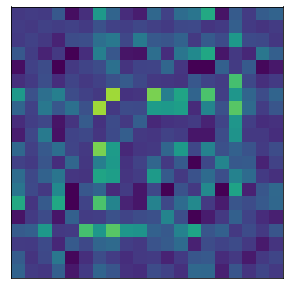

In [623]:
# make small correlation matrix for schematic diagram of community detection algorithm
nkeep = 20
keepinds = np.random.choice(np.arange(0,ncells),nkeep,replace=False)
small_corrmat = corrmat[np.ix_(keepinds,keepinds)]
plt.figure(figsize=(5,5))
plt.imshow(small_corrmat,vmin=-0.05,vmax=0.25)
plt.gca().set_xticks([]) 
plt.gca().set_yticks([]) 
plt.savefig("figs/small_corrmat.png",dpi=300,bbox_inches='tight')

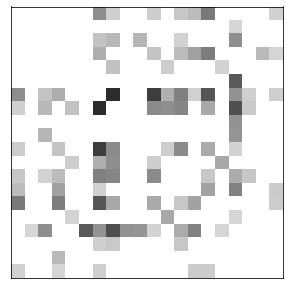

In [624]:
# make thresholded version of correlation matrix
small_corrmat_thresh = np.zeros((nkeep,nkeep))
thresh = 0.04
for i in range(nkeep):
    for j in range(nkeep):
        if small_corrmat[i,j]>thresh:
            small_corrmat_thresh[i,j] = small_corrmat[i,j]
plt.figure(figsize=(5,5))
plt.imshow(small_corrmat_thresh,vmin=0,vmax=0.25,cmap='gray_r')
plt.gca().set_xticks([]) 
plt.gca().set_yticks([]) 
plt.savefig("figs/small_corrmat_thresh.png",dpi=300,bbox_inches='tight')

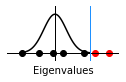

In [661]:
# make fake eigenspectrum plot
plt.figure(figsize=(2,1))
xvec = np.linspace(-2.2,2.2,100)
yvec = np.exp(-np.power(xvec,2))
crossvecnull = [-0.1,-1,-2.1,0.5,1.8]
crossveckeep = [2.5,3.4]
plt.plot(xvec,yvec,c='black')
plt.scatter(crossvecnull,np.zeros(len(crossvecnull)),c='black',marker='o')
plt.scatter(crossveckeep,np.zeros(len(crossveckeep)),c="red",marker='o')
plt.axvline(linewidth=1, color='black')
plt.axhline(linewidth=1, color='black')
plt.axvline(2.2,linewidth=1, color='dodgerblue')
plt.xlabel('Eigenvalues')
plt.gca().set_xlim(left=-3,right=4)
plt.gca().set_ylim(bottom=-0.2,top=1.2)
plt.gca().set_xticks([]) 
plt.gca().set_yticks([]) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig('figs/spectral_rejection_schematic.svg',bbox_inches='tight')

In [744]:
# import cell info which include cell_ids and spike counts, to get firing rates
cell_info = pd.read_csv(folderpath+'/csv/cell_info.csv')
cell_idstest = cell_info[cell_info.mouse_name == 'Krebs'].index.values # extract cell_ids
fr = np.load(folderpath+'/npy/firing_rate_frames/Krebs_0p1_firing.npy')
ratevec = np.zeros(len(fr))
countvec = np.zeros(len(fr))
for i in range(len(fr)):
    cellidthis = fr.loc[i]["cell_id"]
    ratevec[i]=fr.loc[i]["firing_rate"]
    countvec[i]=cell_info[cell_info.mouse_name == 'Krebs'].loc[cellidthis]["total_spikes"]
# plt.scatter(ratevec,countvec)
alpha = ratevec[0]/countvec[0] # scaling factor relating spike count to firing rate

In [1038]:
# calculate geometric means of firing rates for each mouse (slow for all cells)
mouselist = ['Krebs','Robbins','Waksman']
geomeanfiringrates_allmice = []
for j in range(3):
    cell_idstest = cell_info[cell_info.mouse_name == mouselist[j]].index.values # extract cell_ids
    fr = np.load(folderpath+'/npy/firing_rate_frames/'+mouselist[j]+'_0p1_firing.npy')
    ratevec = np.zeros(len(fr))
    countvec = np.zeros(len(fr))
    for i in range(len(fr)):
        cellidthis = fr.loc[i]["cell_id"]
        ratevec[i]=fr.loc[i]["firing_rate"]
        countvec[i]=cell_info[cell_info.mouse_name == mouselist[j]].loc[cellidthis]["total_spikes"]
    # plt.scatter(ratevec,countvec)
    alpha = ratevec[0]/countvec[0] # scaling factor relating spike count to firing rate
    corrfilename = folderpath+'/downdata/analysis_csvs/'+mouselist[j]+'_1p0_analysis.csv'
    corrtablenow = np.loadtxt(open(corrfilename, "rb"), delimiter=",", skiprows=1)
    geomeanfiringrates = np.zeros(len(corrtablenow))
    for i in range(len(corrtablenow)):
#     for i in range(20000):
        cell1id = corrtablenow[i,2]
        cell2id = corrtablenow[i,5]
        cell1fr = alpha*cell_info[cell_info.mouse_name == mouselist[j]].loc[cell1id]["total_spikes"]
        cell2fr = alpha*cell_info[cell_info.mouse_name == mouselist[j]].loc[cell2id]["total_spikes"]
        geomeanfiringrates[i] = np.sqrt(cell1fr*cell2fr)
    geomeanfiringrates_allmice.append([geomeanfiringrates])
np.save('geomeanfiringrates.npy',geomeanfiringrates_allmice)

(0, 21.887151834159507)

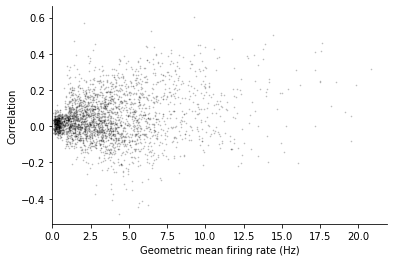

In [1039]:
# plot firing rate vs correlation for Krebs
corrtableKrebs = np.loadtxt(open(folderpath+'/analysis_csvs/Krebs_1p0_analysis.csv', "rb"), delimiter=",", skiprows=1)
plt.scatter(geomeanfiringrates_allmice[0][0][0:2999],corrtableKrebs[0:2999,0],s=0.5,alpha=0.2,c='black')
plt.xlabel("Geometric mean firing rate (Hz)")
plt.ylabel("Correlation")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xlim(left=0)

In [1126]:
# compute mean and sd of correlation as a function of mean firing rate
def get_corrmeansd_vs_fr(corrtablenow,geomeanfiringrates):
    fr_delta = 1
    fr_max = 10
    fr_bins = np.arange(0,fr_max+fr_delta,fr_delta)
    fr_bins_mid = (fr_bins[1:]+fr_bins[0:-1])/2
    corrmean = np.zeros(len(fr_bins)-1)
    corrsd = np.zeros(len(fr_bins)-1)
    for i in range(len(fr_bins)-1):
        inds = np.intersect1d(np.argwhere(geomeanfiringrates>fr_bins[i]),np.argwhere(geomeanfiringrates<fr_bins[i+1]))
        corrmean[i] = np.mean(corrtablenow[inds,0])
        corrsd[i] = np.std(corrtablenow[inds,0])
    return corrmean,corrsd,fr_bins_mid

def get_corrmeansd_vs_fr_list(corrlist,geomeanfiringrates): # same but when corrs are single list
    fr_delta = 1
    fr_max = 10
    fr_bins = np.arange(0,fr_max+fr_delta,fr_delta)
    fr_bins_mid = (fr_bins[1:]+fr_bins[0:-1])/2
    corrmean = np.zeros(len(fr_bins)-1)
    corrsd = np.zeros(len(fr_bins)-1)
    for i in range(len(fr_bins)-1):
        inds = np.intersect1d(np.argwhere(geomeanfiringrates>fr_bins[i]),np.argwhere(geomeanfiringrates<fr_bins[i+1]))
        corrmean[i] = np.nanmean(corrlist[inds])
        corrsd[i] = np.nanstd(corrlist[inds])
    return corrmean,corrsd,fr_bins_mid

def get_corrmeansd_vs_fr_list_log(corrlist,geomeanfiringrates): # same but when corrs are single list and log fr
    log10fr_delta = 0.1
    log10fr_max = 1.2
    fr_bins = np.arange(-1,log10fr_max+log10fr_delta,log10fr_delta)
    fr_bins_mid = (fr_bins[1:]+fr_bins[0:-1])/2
    corrmean = np.zeros(len(fr_bins)-1)
    corrsd = np.zeros(len(fr_bins)-1)
    log10geomeanfiringrates = np.log10(geomeanfiringrates)
    for i in range(len(fr_bins)-1):
        inds = np.intersect1d(np.argwhere(log10geomeanfiringrates>fr_bins[i]),np.argwhere(log10geomeanfiringrates<fr_bins[i+1]))
        corrmean[i] = np.nanmean(corrlist[inds])
        corrsd[i] = np.nanstd(corrlist[inds])
    return corrmean,corrsd,fr_bins_mid

In [1193]:
dtlist = ['0p1','1p0']
for mouse in range(3):
    for dt in range(2):
        cell_idstest = cell_info[cell_info.mouse_name == mouselist[mouse]].index.values
        deltat = dtlist[dt]
        corrfilename = folderpath+'/analysis_csvs/'+mouselist[mouse]+'_'+deltat+'_analysis.csv'
        corrtablenow = np.loadtxt(open(corrfilename, "rb"), delimiter=",", skiprows=1)
intracorrlist=[]
intrageomean=[]
intercorrlist=[]
intergeomean=[]
for i in range(len(corrtablenow)):
# for i in range(20000):
    if len(np.argwhere(cell_ids==corrtablenow[i,2]))>0:
        cell1region = region_ids[np.argwhere(cell_ids==corrtablenow[i,2])][0][0]
        if len(np.argwhere(cell_ids==corrtablenow[i,5]))>0:
            cell2region = region_ids[np.argwhere(cell_ids==corrtablenow[i,5])][0][0]
            if cell1region==cell2region:
                intracorrlist = np.append(intracorrlist,corrtablenow[i,0])
                intrageomean = np.append(intrageomean,geomeanfiringrates_allmice[0][0][i])
            else:
                intercorrlist = np.append(intercorrlist,corrtablenow[i,0])
                intergeomean = np.append(intergeomean,geomeanfiringrates_allmice[0][0][i])

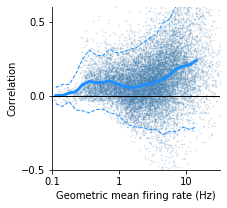

In [1214]:
# plot firing rate vs correlation with fit overlaid for Krebs
plt.figure(figsize=(3,3))
plt.scatter(np.log10(intrageomean),intracorrlist,s=0.5,alpha=0.2,c='steelblue')
plt.xlabel("Geometric mean firing rate (Hz)")
plt.ylabel("Correlation")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xlim(left=-1,right=1.5)
plt.gca().set_ylim(bottom=-0.5,top=0.6)

corrmean_intra,corrsd_intra,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intracorrlist,intrageomean)
plt.plot(fr_bins_mid,corrmean_intra,label="Mean",linewidth=3,c='dodgerblue')
plt.plot(fr_bins_mid,corrmean_intra+2*corrsd_intra,linewidth=1,linestyle='dashed',c='dodgerblue')
plt.plot(fr_bins_mid,corrmean_intra-2*corrsd_intra,linewidth=1,linestyle='dashed',c='dodgerblue')
plt.axhline(linewidth=1, color='black')
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.yticks([-0.5,0,0.5])
plt.savefig("figs/corr_vs_firingrate_Krebs_intra_"+deltat+".png",dpi=500,bbox_inches='tight')
plt.savefig("figs/corr_vs_firingrate_Krebs_intra_"+deltat+".svg",bbox_inches='tight')

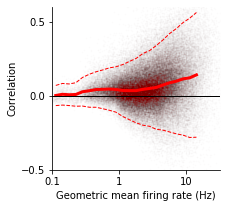

In [1215]:
# plot firing rate vs correlation with fit overlaid for Krebs
plt.figure(figsize=(3,3))
plt.scatter(np.log10(intergeomean),intercorrlist,s=0.5,alpha=0.01,c='maroon')
plt.xlabel("Geometric mean firing rate (Hz)")
plt.ylabel("Correlation")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xlim(left=-1,right=1.5)
plt.gca().set_ylim(bottom=-0.5,top=0.6)

corrmean_inter,corrsd_inter,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intercorrlist,intergeomean)
plt.plot(fr_bins_mid,corrmean_inter,label="Mean",linewidth=3,c='red')
plt.plot(fr_bins_mid,corrmean_inter+2*corrsd_inter,linewidth=1,linestyle='dashed',c='red')
plt.plot(fr_bins_mid,corrmean_inter-2*corrsd_inter,linewidth=1,linestyle='dashed',c='red')
plt.axhline(linewidth=1, color='black')
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.yticks([-0.5,0,0.5])
plt.savefig("figs/corr_vs_firingrate_Krebs_inter_"+deltat+".png",dpi=500,bbox_inches='tight')
plt.savefig("figs/corr_vs_firingrate_Krebs_inter_"+deltat+".svg",bbox_inches='tight')

In [1216]:
# Fuction for getting JS divergence between two gaussians in range -1:+1
def getJSDiv_2gaussians(mu1,sigma1,mu2,sigma2):
    xmin = np.min((mu1-3*sigma1,mu2-3*sigma2))
    xmax = np.max((mu1+3*sigma1,mu2+3*sigma2))
    a_intra = norm(loc=mu1, scale=sigma1)
    f_intra = a_intra.pdf(np.linspace(xmin,xmax,50))
    f_intra = f_intra/np.sum(f_intra)
    a_inter = norm(loc=mu2, scale=sigma2)
    f_inter = a_inter.pdf(np.linspace(xmin,xmax,50))
    f_inter = f_inter/np.sum(f_inter)
    pvec_mix = 0.5*(f_intra+f_inter)
    KLdiv_intra_mix = 0
    KLdiv_inter_mix = 0
    for i in range(len(pvec_mix)):
        if pvec_mix[i]>0:
            KLdiv_intra_mix += f_intra[i] * np.log2(f_intra[i]/pvec_mix[i])
            KLdiv_inter_mix += f_inter[i] * np.log2(f_inter[i]/pvec_mix[i])
    JSdiv = 0.5*(KLdiv_intra_mix + KLdiv_inter_mix)
    return JSdiv

In [1217]:
# get JS divergence as a function of geometric mean firing rate
# def getJSdiv_vs_fr:
JSdiv_vec = np.zeros(len(corrmean_intra))
for i in range(len(corrmean_intra)):
    JSdiv_vec[i]=getJSDiv_2gaussians(corrmean_intra[i],corrsd_intra[i],corrmean_inter[i],corrsd_inter[i])
# plt.plot(fr_bins_mid,JSdiv_vec)
# plt.xlabel('Geometric firing rate (Hz)')
# plt.ylabel('JS divergence')
# plt.savefig('figs/Krebs_jsdiv_vs_fr_0p0.png')

In [1218]:
JSdiv_vec_1p0 = JSdiv_vec
# JSdiv_vec_0p1 = JSdiv_vec

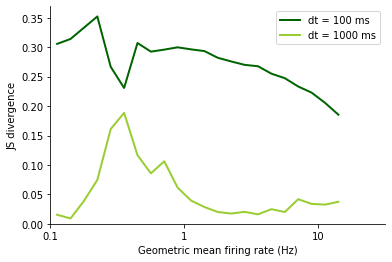

In [1237]:
plt.plot(fr_bins_mid,JSdiv_vec_0p1,label="dt = 100 ms",linewidth=2,c='darkgreen')
plt.plot(fr_bins_mid,JSdiv_vec_1p0,label="dt = 1000 ms",linewidth=2,c='yellowgreen')
plt.ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xlim(left=-1,right=1.5)
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.gca().set_xlim(left=-1,right=1.5)
# plt.gca().set_ylim(bottom=-0.5,top=0.6)
plt.xlabel('Geometric mean firing rate (Hz)')
plt.ylabel('JS divergence')
plt.legend()
plt.savefig('figs/Krebs_jsdiv_vs_logfr.png',dpi=400)
plt.savefig('figs/Krebs_jsdiv_vs_logfr.svg')

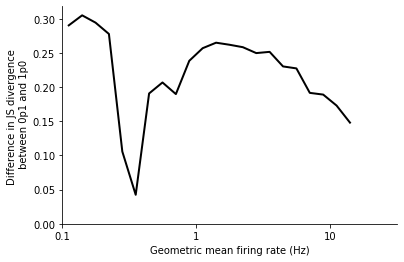

In [1238]:
plt.plot(fr_bins_mid,JSdiv_vec_0p1-JSdiv_vec_1p0,c='black',linewidth=2)
plt.ylim(bottom=0)
plt.xlabel('Geometric mean firing rate (Hz)')
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.gca().set_xlim(left=-1,right=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Difference in JS divergence \n between 0p1 and 1p0')
plt.savefig('figs/Krebs_diff_jsdiv_vs_logfr.png',dpi=400)
plt.savefig('figs/Krebs_diff_jsdiv_vs_logfr.svg')

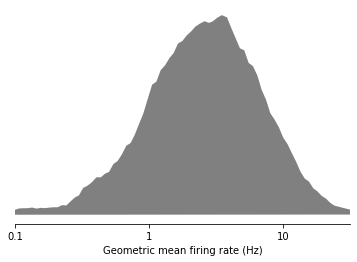

In [1245]:
xhist,x = np.histogram(np.log10(geomeanfiringrates_allmice[0][0]),bins=100)
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.yticks([])
plt.gca().set_xlim(left=-1,right=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel('Geometric mean firing rate (Hz)')
plt.fill(x[0:-1],xhist,c='grey',linewidth=2)
plt.savefig('figs/Krebs_geomean_firingrate_histogram.png',dpi=400)
plt.savefig('figs/Krebs_geomean_firingrate_histogram.svg')

In [1281]:
# load data function
def getcellandregionids(mousename,deltat):
    infile = open('/Users/co15268/OneDrive - University of Bristol/eightprobe/Eight_Probe/npy/communities/'+mousename+'_'+deltat+'_rectified_total_signal_final_cell_info.pkl','rb')
    data_load = pickle.load(infile)
    infile.close()
    data_load_sorted = data_load.sort_values(by=['cell_region'])
    data_table = data_load_sorted
    # extract cell ids and convert to array
    a = data_table.index
    cell_ids = list(a)
    # extract region ids and convert to array
    a = data_table["cell_region"].items()
    b = list(a)
    c = np.array(b)
    region_ids = c[:,1]
    return cell_ids, region_ids

In [1333]:
# Function for plotting firing rate vs correlation with fit overlaid
def plotcorrvsfiring(intrageomean,intracorrlist,intergeomean,intercorrlist,mousename,deltat):
    plt.figure(figsize=(3,3))
    plt.scatter(np.log10(intrageomean),intracorrlist,s=0.5,alpha=0.2,c='steelblue')
    plt.xlabel("Geometric mean firing rate (Hz)")
    plt.ylabel("Correlation")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().set_xlim(left=-1,right=1.5)
    plt.gca().set_ylim(bottom=-0.5,top=0.6)
    corrmean_intra,corrsd_intra,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intracorrlist,intrageomean)
    plt.plot(fr_bins_mid,corrmean_intra,label="Mean",linewidth=3,c='dodgerblue')
    plt.plot(fr_bins_mid,corrmean_intra+2*corrsd_intra,linewidth=1,linestyle='dashed',c='dodgerblue')
    plt.plot(fr_bins_mid,corrmean_intra-2*corrsd_intra,linewidth=1,linestyle='dashed',c='dodgerblue')
    plt.axhline(linewidth=1, color='black')
    plt.xticks([-1,0,1],['0.1', '1', '10'])
    plt.yticks([-0.5,0,0.5])
    plt.savefig('figs/corr_vs_firingrate_'+mousename+'_intra_'+deltat+'.png',dpi=500,bbox_inches='tight')
    plt.savefig('figs/corr_vs_firingrate_'+mousename+'_intra_'+deltat+'.svg',bbox_inches='tight')
    plt.figure(figsize=(3,3))
    plt.scatter(np.log10(intergeomean),intercorrlist,s=0.5,alpha=0.01,c='maroon')
    plt.xlabel("Geometric mean firing rate (Hz)")
    plt.ylabel("Correlation")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().set_xlim(left=-1,right=1.5)
    plt.gca().set_ylim(bottom=-0.5,top=0.6)
    corrmean_inter,corrsd_inter,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intercorrlist,intergeomean)
    plt.plot(fr_bins_mid,corrmean_inter,label="Mean",linewidth=3,c='red')
    plt.plot(fr_bins_mid,corrmean_inter+2*corrsd_inter,linewidth=1,linestyle='dashed',c='red')
    plt.plot(fr_bins_mid,corrmean_inter-2*corrsd_inter,linewidth=1,linestyle='dashed',c='red')
    plt.axhline(linewidth=1, color='black')
    plt.xticks([-1,0,1],['0.1', '1', '10'])
    plt.yticks([-0.5,0,0.5])
    plt.savefig('figs/corr_vs_firingrate_'+mousename+'_inter_'+deltat+'.png',dpi=500,bbox_inches='tight')
    plt.savefig('figs/corr_vs_firingrate_'+mousename+'_inter_'+deltat+'.svg',bbox_inches='tight')

In [1335]:
dtlist = ['0p1','1p0']
JS_diffstore = []
for mouse in range(3):
    JS_store = []
    for dt in range(2):
        cell_idstest = cell_info[cell_info.mouse_name == mouselist[mouse]].index.values
        deltat = dtlist[dt]
        cell_ids, region_ids = getcellandregionids(mouselist[mouse],deltat)
        corrfilename = '/Users/co15268/OneDrive - University of Bristol/eightprobe/downdata/analysis_csvs/'+mouselist[mouse]+'_'+deltat+'_analysis.csv'
        corrtablenow = np.loadtxt(open(corrfilename, "rb"), delimiter=",", skiprows=1)
        intracorrlist=[]
        intrageomean=[]
        intercorrlist=[]
        intergeomean=[]
        for i in range(len(corrtablenow)):
#         for i in range(20000):
            if len(np.argwhere(cell_ids==corrtablenow[i,2]))>0:
                cell1region = region_ids[np.argwhere(cell_ids==corrtablenow[i,2])][0][0]
                if len(np.argwhere(cell_ids==corrtablenow[i,5]))>0:
                    cell2region = region_ids[np.argwhere(cell_ids==corrtablenow[i,5])][0][0]
                    if cell1region==cell2region:
                        intracorrlist = np.append(intracorrlist,corrtablenow[i,0])
                        intrageomean = np.append(intrageomean,geomeanfiringrates_allmice[0][0][i])
                    else:
                        intercorrlist = np.append(intercorrlist,corrtablenow[i,0])
                        intergeomean = np.append(intergeomean,geomeanfiringrates_allmice[0][0][i])
        plotcorrvsfiring(intrageomean,intracorrlist,intergeomean,intercorrlist,mouselist[mouse],deltat)
        corrmean_intra,corrsd_intra,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intracorrlist,intrageomean)
        corrmean_inter,corrsd_inter,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intercorrlist,intergeomean)
        JSdiv_vec = np.zeros(len(corrmean_intra))
        for i in range(len(corrmean_intra)):
            JSdiv_vec[i]=getJSDiv_2gaussians(corrmean_intra[i],corrsd_intra[i],corrmean_inter[i],corrsd_inter[i])
        JS_store.append(JSdiv_vec)
    JS_diffstore.append(JS_store[0]-JS_store[1])
    plt.plot(fr_bins_mid,JS_store[0],label="dt = 100 ms",linewidth=1,c='darkgreen')
    plt.plot(fr_bins_mid,JS_store[1],label="dt = 1000 ms",linewidth=1,c='yellowgreen')
plt.show()

IndexError: index 1105 is out of bounds for axis 1 with size 495

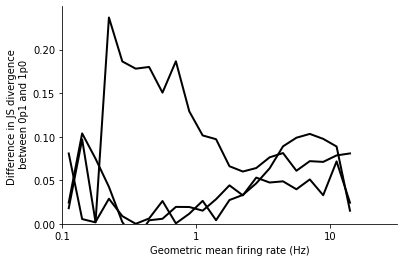

In [1328]:
for i in range(3):
    plt.plot(fr_bins_mid,JS_diffstore[i],c='black',linewidth=2)
plt.ylim(bottom=0)
plt.xlabel('Geometric mean firing rate (Hz)')
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.gca().set_xlim(left=-1,right=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Difference in JS divergence \n between 0p1 and 1p0')
plt.show()

In [1269]:
dtlist = ['0p1','1p0']
cell_idstest = cell_info[cell_info.mouse_name == mouselist[1]].index.values
deltat = '0p1'
corrfilename = '/Users/co15268/OneDrive - University of Bristol/eightprobe/downdata/analysis_csvs/'+mouselist[1]+'_'+deltat+'_analysis.csv'
corrtablenow = np.loadtxt(open(corrfilename, "rb"), delimiter=",", skiprows=1)

In [1270]:
intracorrlist=[]
intrageomean=[]
intercorrlist=[]
intergeomean=[]
for i in range(len(corrtablenow)):
#         for i in range(20000):
    if len(np.argwhere(cell_ids==corrtablenow[i,2]))>0:
        cell1region = region_ids[np.argwhere(cell_ids==corrtablenow[i,2])][0][0]
        if len(np.argwhere(cell_ids==corrtablenow[i,5]))>0:
            cell2region = region_ids[np.argwhere(cell_ids==corrtablenow[i,5])][0][0]
            if cell1region==cell2region:
                intracorrlist = np.append(intracorrlist,corrtablenow[i,0])
                intrageomean = np.append(intrageomean,geomeanfiringrates_allmice[0][0][i])
            else:
                intercorrlist = np.append(intercorrlist,corrtablenow[i,0])
                intergeomean = np.append(intergeomean,geomeanfiringrates_allmice[0][0][i])


In [1272]:
corrmean_intra,corrsd_intra,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intracorrlist,intrageomean)
corrmean_inter,corrsd_inter,fr_bins_mid = get_corrmeansd_vs_fr_list_log(intercorrlist,intergeomean)

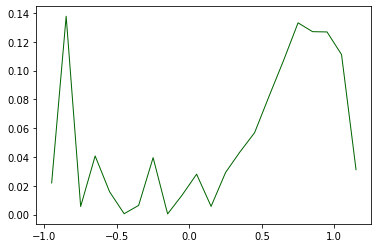

In [1273]:
JSdiv_vec = np.zeros(len(corrmean_intra))
for i in range(len(corrmean_intra)):
    JSdiv_vec[i]=getJSDiv_2gaussians(corrmean_intra[i],corrsd_intra[i],corrmean_inter[i],corrsd_inter[i])
if dt == 0:
    plt.plot(fr_bins_mid,JSdiv_vec,label="dt = 100 ms",linewidth=1,c='darkgreen')
else:
    plt.plot(fr_bins_mid,JSdiv_vec,label="dt = 1000 ms",linewidth=1,c='yellowgreen')
plt.show()

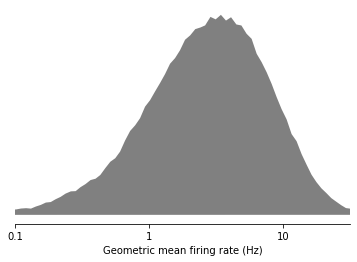

In [1279]:
xhist,x = np.histogram(np.log10(geomeanfiringrates_allmice[2][0]),bins=100)
plt.xticks([-1,0,1],['0.1', '1', '10'])
plt.yticks([])
plt.gca().set_xlim(left=-1,right=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel('Geometric mean firing rate (Hz)')
plt.fill(x[0:-1],xhist,c='grey',linewidth=2)
plt.savefig('figs/Krebs_geomean_firingrate_histogram.png',dpi=400)
plt.savefig('figs/Krebs_geomean_firingrate_histogram.svg')